**Name :** Natasha Kayla Cahyadi

**NIM :** 2702235891

**Class :** LB09 - Machine Learning

The **target** of this machine learning project in this dataset is **loan status** for every applicants, either they'll **rejected** or **approved**. We can make a model to achieve the target by using another features that we have in this dataset. By applying machine learning techniques, we'll create a model that can **classified** applicants into the **loan status**.

The dataset contains **45,000 records and 14 variables**, each described below:

- **person_age**: Age of the person

- **person_gender**:	Gender of the person

- **person_education**:	Highest education level

- **person_income**:	Annual income

- **person_emp_exp**:	Years of employment experience

- **person_home_ownership**:	Home ownership status (e.g., rent, own, mortgage)

- **loan_amnt**:	Loan amount requested

- **loan_intent**:	Purpose of the loan

- **loan_int_rate**:	Loan interest rate

- **loan_percent_income**:	Loan amount as a percentage of annual income

- **cb_person_cred_hist_length**:	Length of credit history in years

- **credit_score**:	Credit score of the person

- **previous_loan_defaults_on_file**:	Indicator of previous loan defaults

- **loan_status (target variable)**:	Loan approval status: 1 = approved; 0 = rejected

 **From the final project, describe briefly about the modelling results (from the 4 task options). Here are the things that you need to explain:**
- The machine learning algorithm that you choose and why did you choose it
- Training and evaluation results of the proposed model, as well as the analysis
- Training and evaluation results of the baseline model, as well as the analysis
- Existing challenges and possible future works

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

# **Exploratory Data Analysis**

In [2]:
# Read the Dataset
df = pd.read_csv('loan_data.csv')

In [3]:
# Display the data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# Display the data
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
# Show data columns
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
# Show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

**Variable in this dataset :**
- person_age, data type : float
- person_gender, data type : object
- person_education, data type : object
- person_income, data type : float
- person_emp_exp, data type : int
- person_home_ownership, data type : object
- loan_amnt, data type : float
- loan_intent, data type : object
- loan_int_rate, data type : float
- loan_percent_income, data type : float
- cb_person_cred_hist_length, data type : float
- credit_score, data type : int
- previous_loan_defaults_on_file, data type : object
- loan_status, data type : int

**Range Index :** 45000 entries

**Number of Columns :** 14

**Memory Usage :** 4.8+ MB

In [7]:
# Show duplicated data
df.duplicated().sum()

0

There is **no duplicated** in this dataset.

In [8]:
# Show NULL values
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


There is no **NULL** values in this dataset.

In [9]:
# Show statistics descriptive
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [10]:
# Show unique number
df.nunique()

,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [11]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numeric: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


We divide the variables into **categorical** and **numerical** to simplify our data preprocessing.

In [12]:
# Count the categorical values in each columns
for i in categorical_columns:
    print(df[i].value_counts(),'\n')

person_gender
male      24841
female    20159
Name: count, dtype: int64 

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64 

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64 

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64 



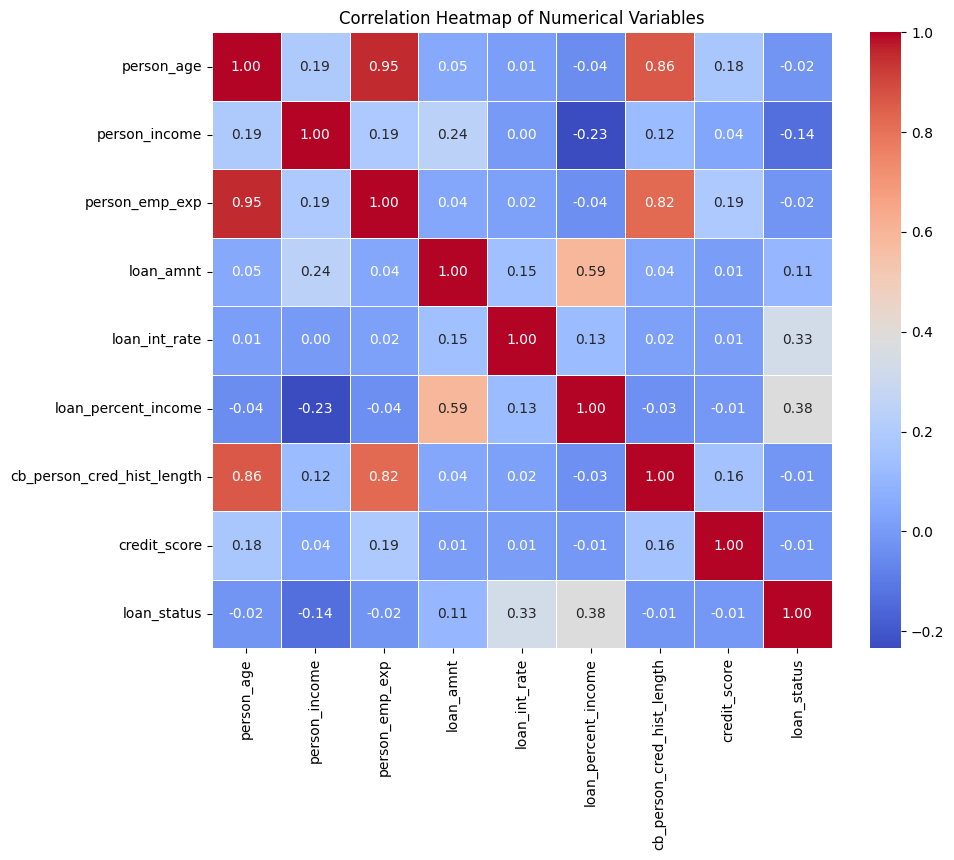

In [13]:
# Store the numerical variable to numerical_cols
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix of numerical_cols
corr_matrix = numerical_cols.corr()
# Make a plot of heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

- corr **loan status** with **credit_score** and **cb_person_cred_hist_length** are -0.01.

- corr **loan_status** with **person_emp_exp** and **person_age** are 0.02.

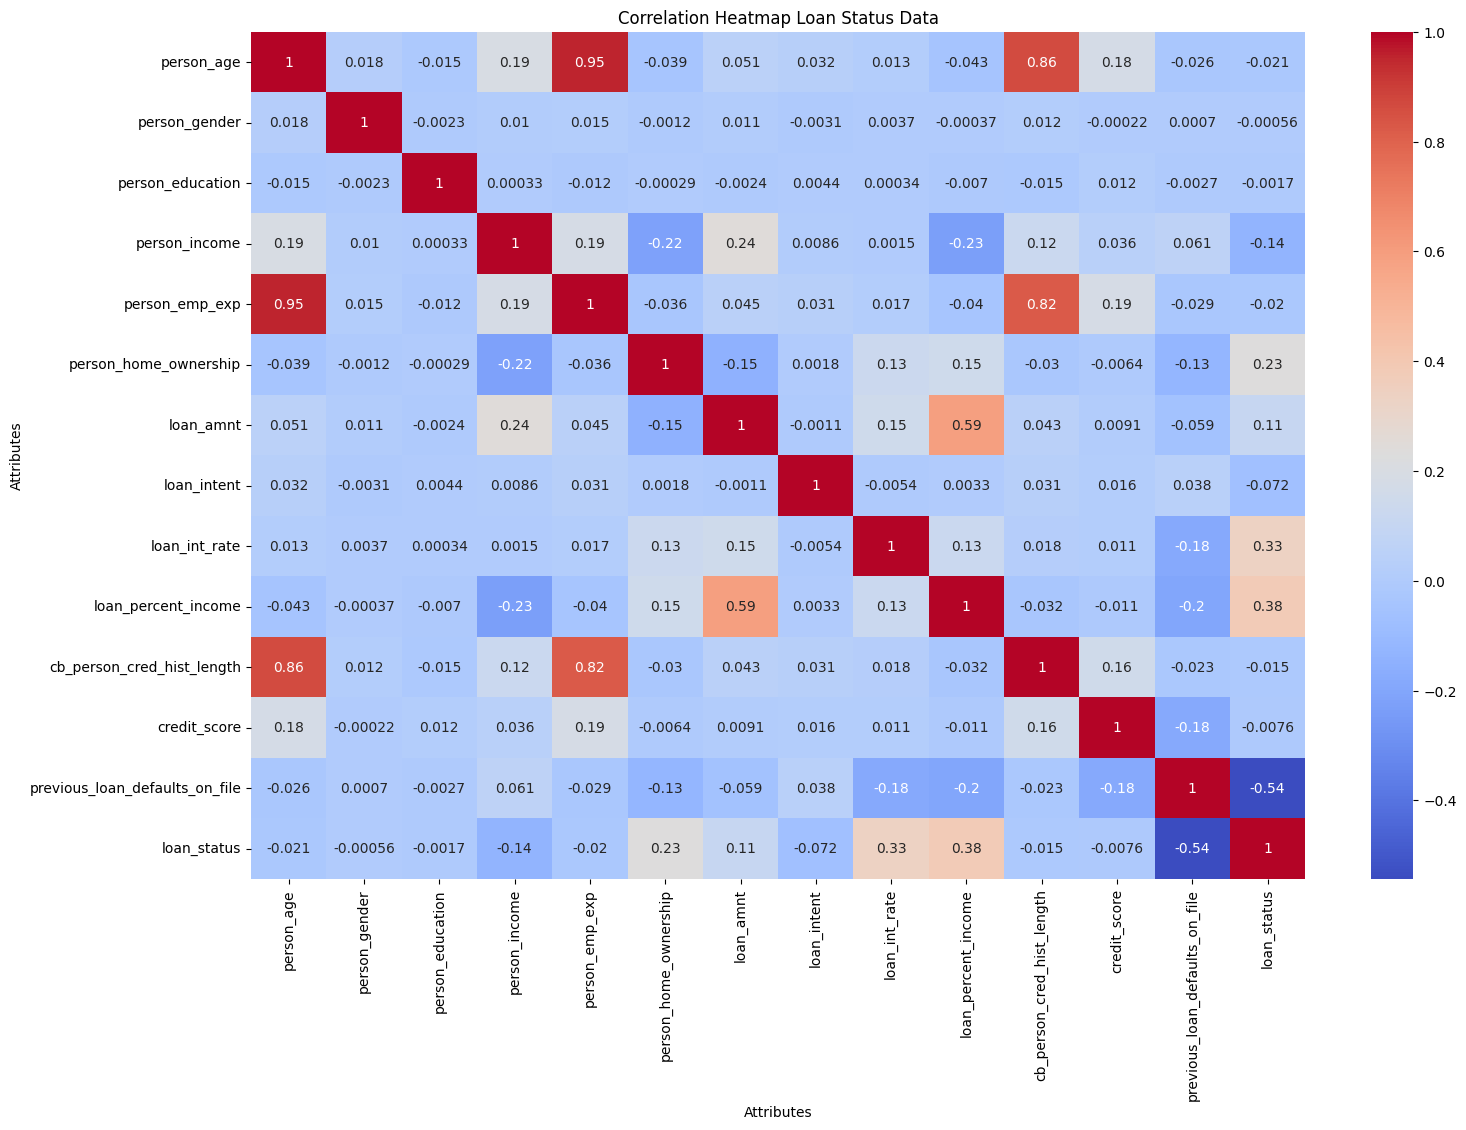

In [14]:
# Import library
from sklearn.preprocessing import LabelEncoder
data = df.copy()

bin_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = bin_enc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Loan Status Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

- corr **loan_status** with **person_gender** is -0.00056.

- corr **loan_status** with **person_education** is -0.0017.

- corr **loan_status** with **loan_intent** is -0.072.


Even though those columns have **low correlation** with **loan_status**, we won't delete those columns because **loan_status** don't have high correlation with every columns.

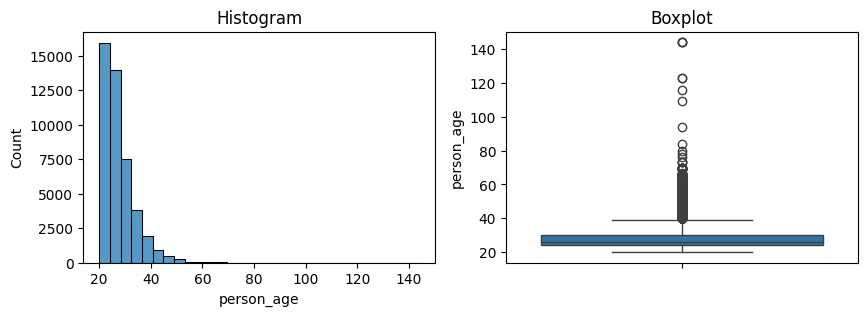

Skewness: 2.5481540050382425
Kurtosis: 18.64944898184852


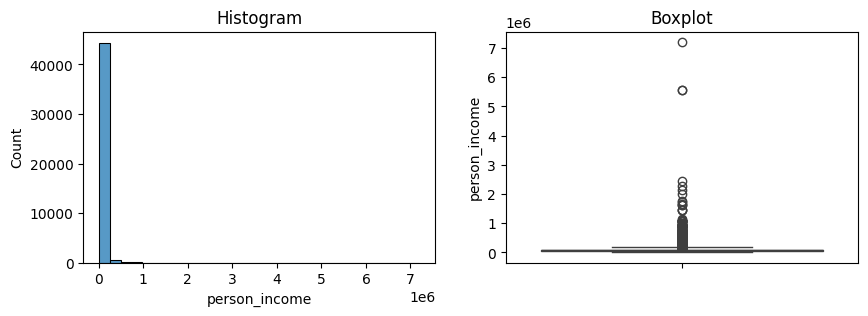

Skewness: 34.137583132969915
Kurtosis: 2398.6847694864778


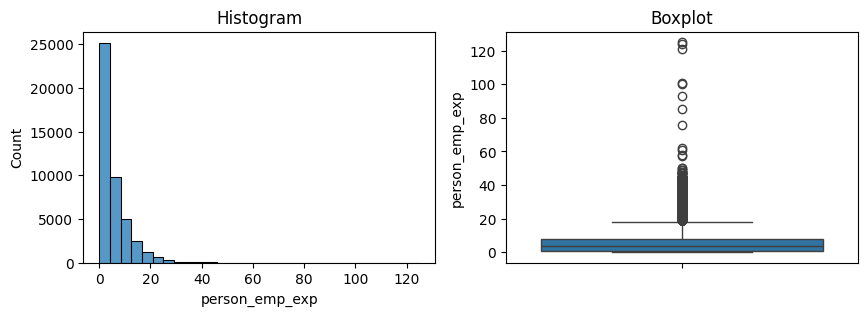

Skewness: 2.5949173726318255
Kurtosis: 19.1683237539473


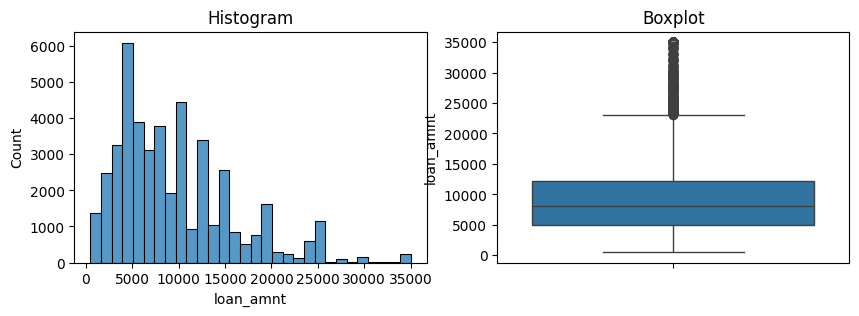

Skewness: 1.1797312856279223
Kurtosis: 1.3512152308228198


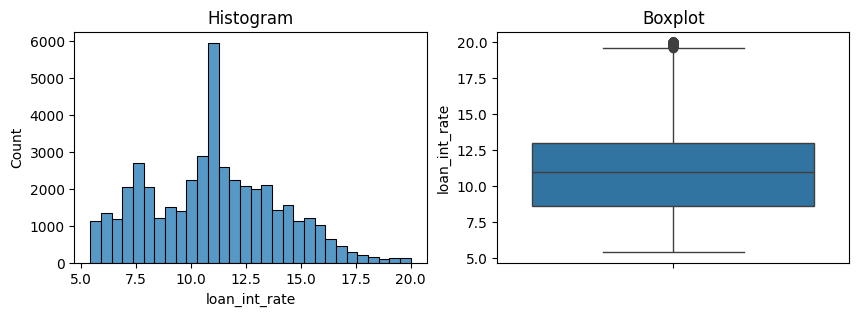

Skewness: 0.21378407238735642
Kurtosis: -0.42033530822379506


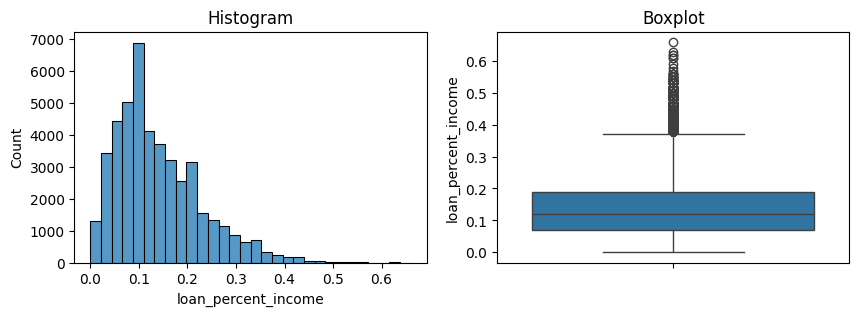

Skewness: 1.034512151182724
Kurtosis: 1.0824162412535965


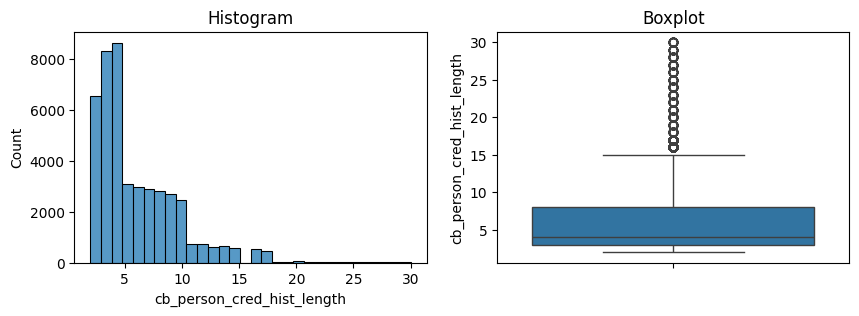

Skewness: 1.6317199538415355
Kurtosis: 3.725944524091197


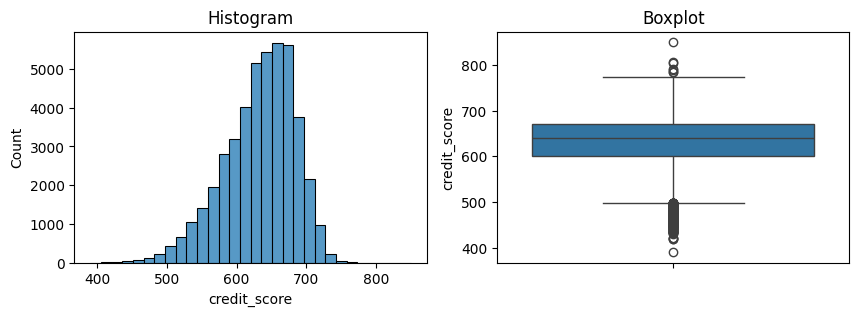

Skewness: -0.6102608322577946
Kurtosis: 0.20302185635702363


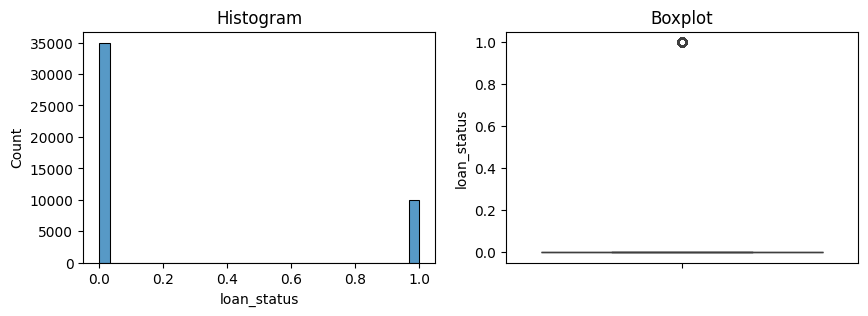

Skewness: 1.3363507549997484
Kurtosis: -0.21417618052832044


In [15]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df[numerical_columns], numerical_columns)

Outliers in **person_age** and **person_emp_exp** don't make sense. **Age** above **80** and **employment experience** above **60** is not possible.

In [16]:
df[df['person_age'] > 80]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32506,84.0,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


In [17]:
df[df['person_emp_exp'] > 60]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32422,80.0,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25.0,673,No,0
32506,84.0,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


Outliers in those columns were **not many**, so we choose to **remove** those values from the dataset.

In [18]:
df = df[df['person_age'] <= 80]
df = df[df['person_emp_exp'] <= 60]

In [19]:
df[df['person_age'] > 80]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [20]:
df[df['person_emp_exp'] > 60]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


Success remove the outliers.

<ipython-input-21-662980e0b3c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, ax=ax[2][1], palette='Greens')


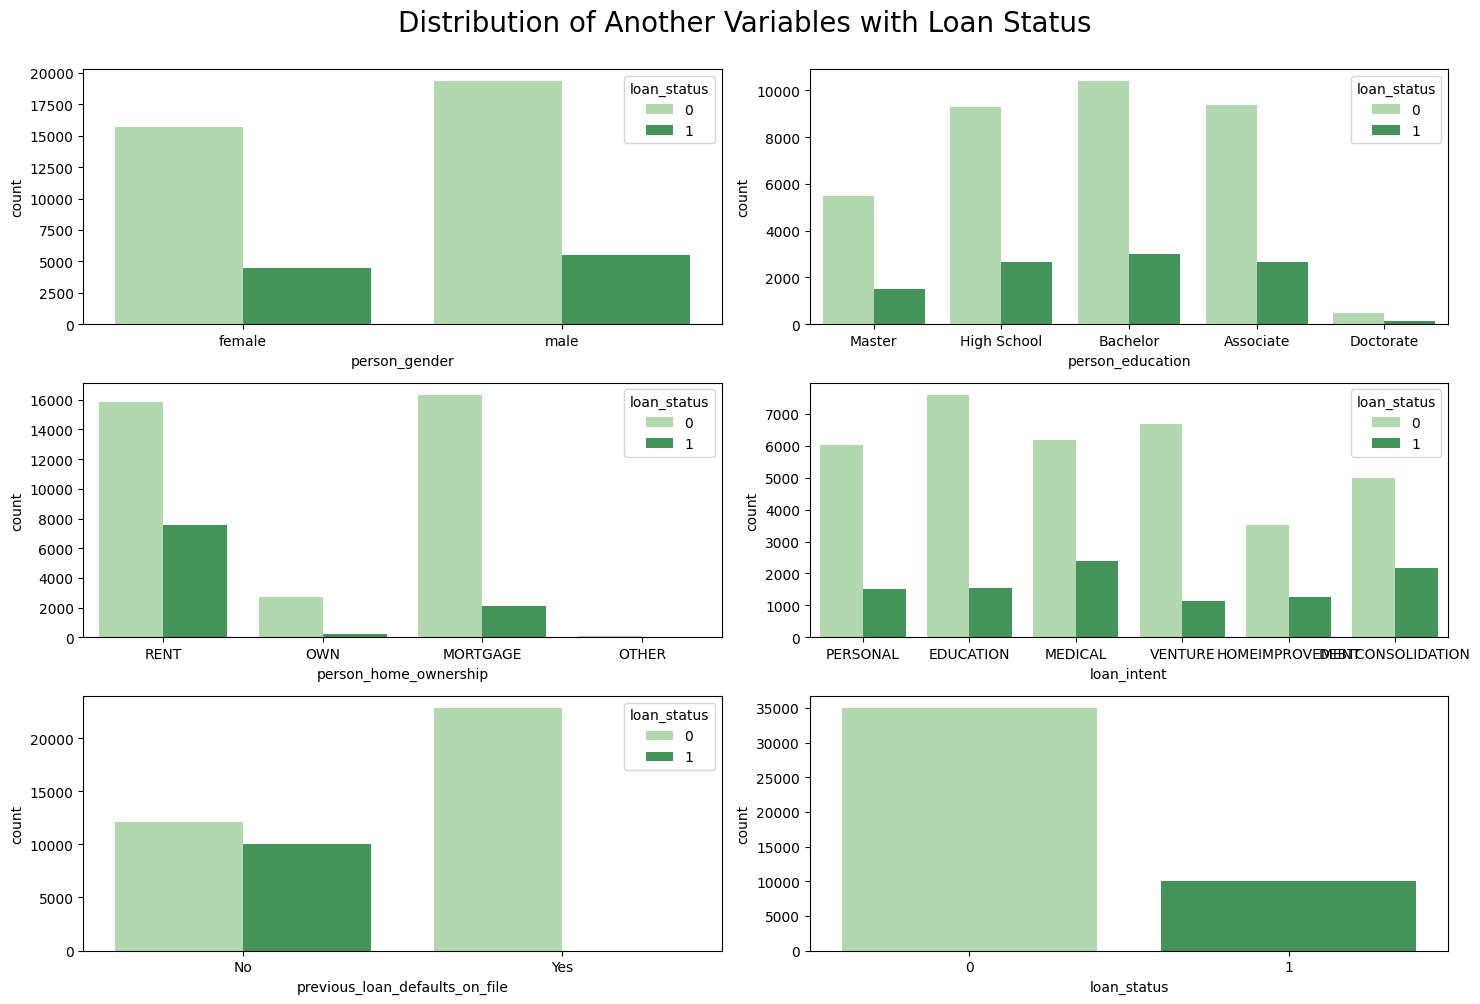

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Create Subplots
sns.countplot(x="person_gender", hue="loan_status", data=df, ax=ax[0][0], palette='Greens')
sns.countplot(x="person_education", hue="loan_status", data=df, ax=ax[0][1], palette='Greens')
sns.countplot(x="person_home_ownership", hue="loan_status", data=df, ax=ax[1][0], palette='Greens')
sns.countplot(x="loan_intent", hue="loan_status", data=df, ax=ax[1][1], palette='Greens')
sns.countplot(x="previous_loan_defaults_on_file", hue="loan_status", data=df, ax=ax[2][0], palette='Greens')
sns.countplot(x="loan_status", data=df, ax=ax[2][1], palette='Greens')


fig.suptitle('Distribution of Another Variables with Loan Status', fontsize=20, y=1)

plt.tight_layout()
plt.show()

**Distribution Another Variable with Loan Status**
- **person_gender :** for both genders, more loans were **rejected** than approved.
- **person_education :** higher education levels like **master** or **doctorate** have **fewer** applicants, and their approval rates are **slightly higher** relative to **lower** education levels.
- **person_home_ownership :** people with **mortgage** ownership have **higher approval** rates compared to other categories.
- **loan_intent :** **approval rates** are higher for **debt consolidation** and **home improvement**, but **venture** and **medical** have very high **denial** rates.
- **previous_loan_defaults_on_file :** people with **no previous** loan defaults have significantly more **loan approvals**.

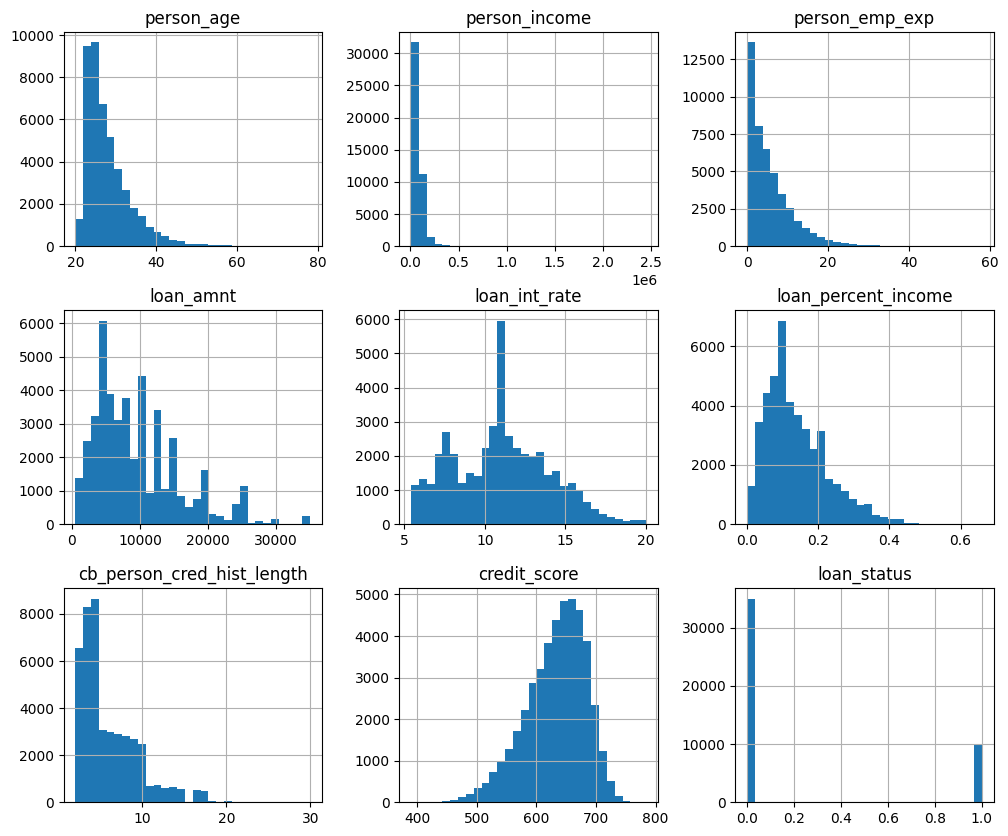

In [22]:
# distribution of numerical features after removing the outlier
df[numerical_columns].hist(bins=30, figsize=(12,10))
plt.show()

Mostly all **numerical columns** are **not normally distributed**.

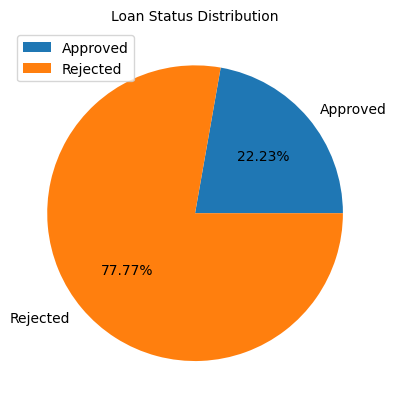

In [23]:
# Plot to see the comparison about churned and not churned
sizes = [df.loan_status[df['loan_status'] == 1].count(), df.loan_status[df['loan_status'] == 0].count()]
labels = ['Approved', 'Rejected']
plt.pie(sizes, labels=labels,autopct = '%.2f%%')
plt.legend(loc='upper left')
plt.title("Loan Status Distribution", size = 10)
plt.show()

We can see that the comparison people that being **approved** (77.77%) and **rejected** (22.23%) is about 4 : 1.

# **Data Preprocessing**

In [24]:
# Display the Data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [25]:
# Import libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ohe_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
bin_enc = LabelEncoder()

Encode all the **categorical columns** because the model will only learn by **numeric**.

In [26]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = ohe_enc.fit_transform(df[['person_home_ownership', 'loan_intent']])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_enc.get_feature_names_out(['person_home_ownership', 'loan_intent']))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df = df.drop(['person_home_ownership', 'loan_intent'], axis=1)

We use **one-hot encoding** to **person_home_ownership** and **loan_intent** columns because those categories are **independent** without **any order** or **hierarcy**.

In [27]:
# Fit transform the columns with label encoder
df['person_gender'] = bin_enc.fit_transform(df[['person_gender']])
df['person_education'] = bin_enc.fit_transform(df[['person_education']])
df['previous_loan_defaults_on_file'] = bin_enc.fit_transform(df[['previous_loan_defaults_on_file']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For **person_gender** and **previous_loan_defaults_on_file**, we use **label encoding** because those categories only have **two types of values**. For **person_education** column, we use **label encoding** because that variable has an **order or hierarcy values**.

In [28]:
# Display the Data
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,3,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,3,12438.0,3,5500.0,12.87,0.44,3.0,635,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Split Data**

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Drop the churn column for the variable x
x = df[df.columns.drop(['loan_status'])]
# Fill the y variable with churn
y = df['loan_status']

**x** are **independent** variables and **y** is **target** of the model. In this dataset, we use **loan_status** as **y** because the target of this dataset is **segmentation**, and **another columns** as **x**. After that, split the data into **80%** to **train data** and **20%** to **test data**.

# **Handling Imbalance Data**

In [30]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x, y)

# Display resampled class distribution
print("Resampled Distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled Distribution:
loan_status
0    10000
1    10000
Name: count, dtype: int64


Our target **loan_status** column has **imbalance data**, so we need to do **undersampling** or **oversampling** to balance our data. We choose **undersampling** because our data is already have **45.000 entries**, so **undersampling** is the best choice for this dataset.

# **Train Data**

In [31]:
# Split the data to 80% train data and 20% test data
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.2,random_state=123)
print(x_train.shape,x_test.shape)

(16000, 21) (4000, 21)


In [32]:
# Initialize Scalers
rob_scaler = RobustScaler()

# Scale the x train and x test
x_train = rob_scaler.fit_transform(x_train)
x_test = rob_scaler.transform(x_test)

We use **robust scaler** because our data is not normally distributed.

# **Find Best Model**

In [33]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1985
           1       0.85      0.92      0.89      2015

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



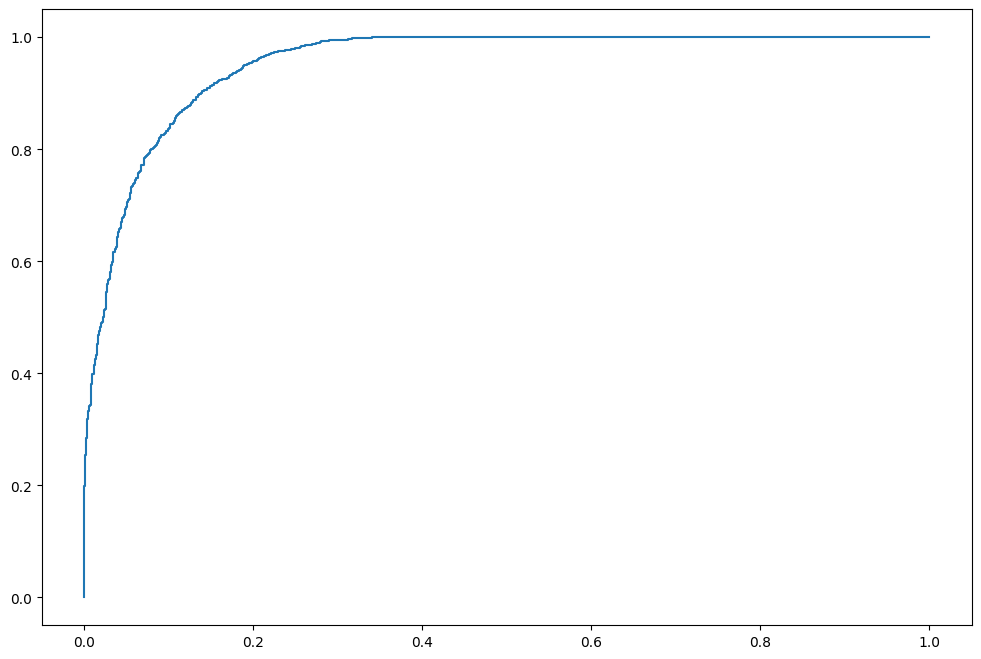

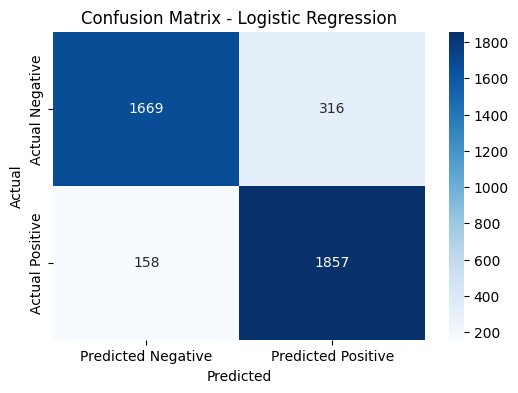

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1985
           1       0.85      0.89      0.87      2015

    accuracy                           0.86      4000
   macro avg       0.87      0.86      0.86      4000
weighted avg       0.87      0.86      0.86      4000



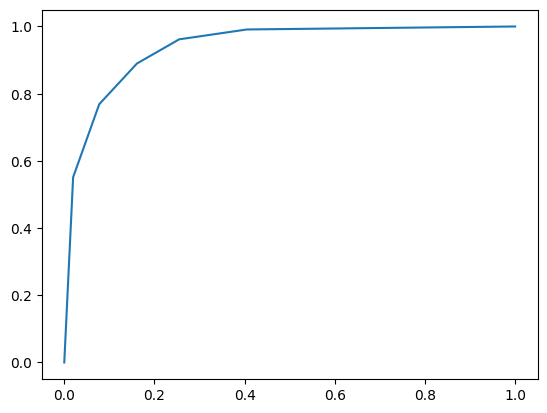

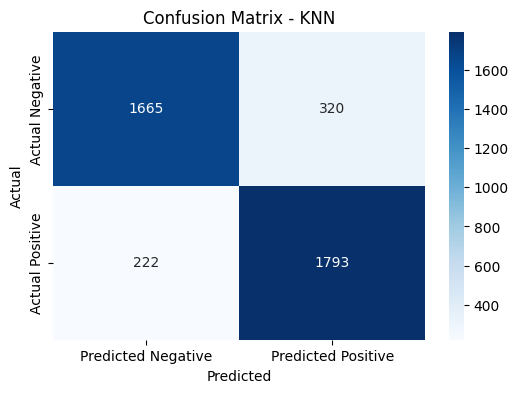

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1985
           1       0.86      0.93      0.90      2015

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



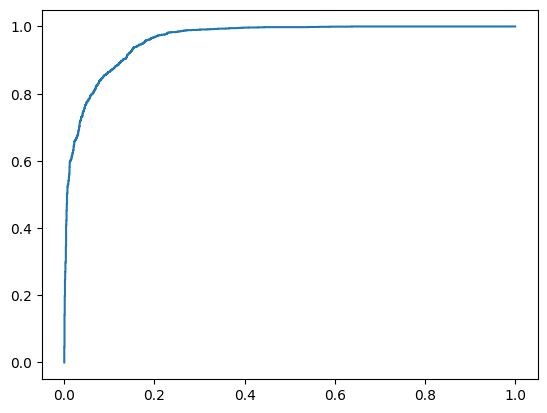

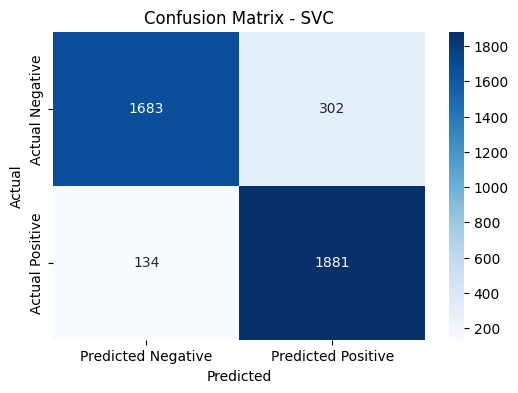

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1985
           1       0.88      0.87      0.88      2015

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



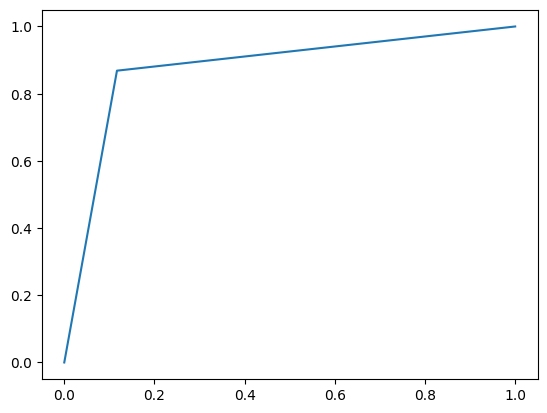

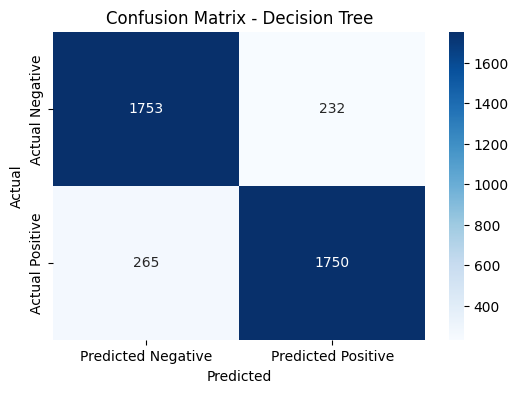

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1985
           1       0.89      0.91      0.90      2015

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



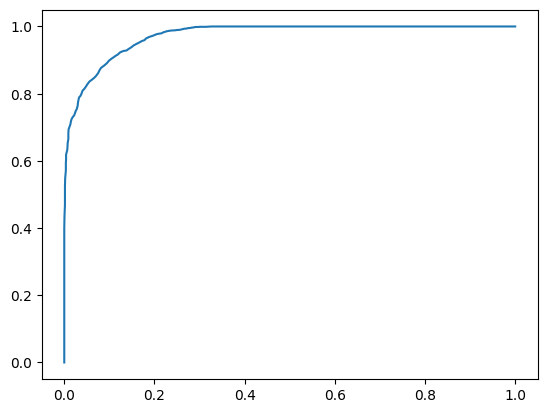

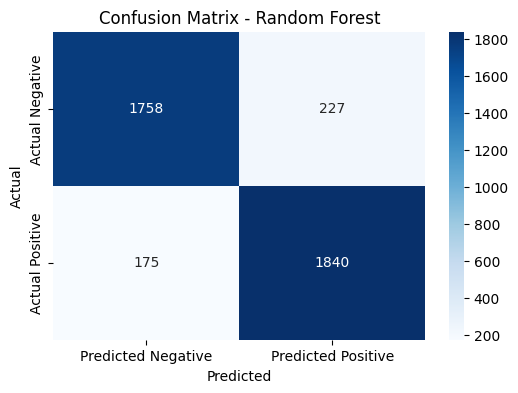

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1985
           1       0.90      0.91      0.91      2015

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



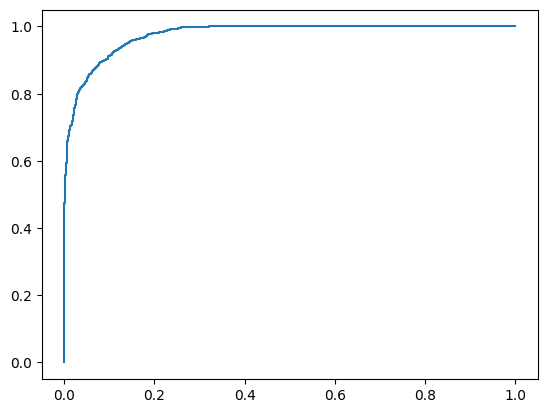

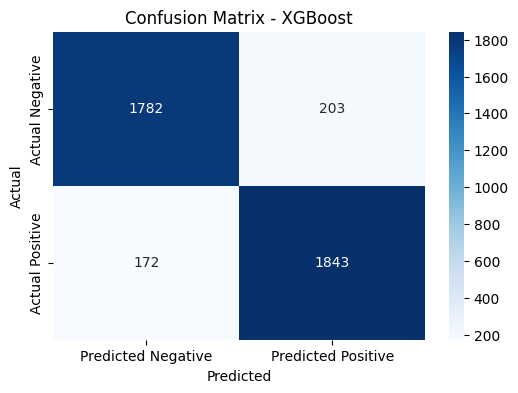

In [34]:
# Function to train model and return predictions, probabilities, and metrics
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Get predicted labels
    y_pred = model.predict(x_test)

    # Get predicted probabilities for positive class (class 1)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)

    # Calculate FPR, TPR, and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Return predictions, probabilities, and performance metrics
    return y_pred, y_prob, fpr, tpr, roc_auc

# Function to print classification report and plot ROC curve
def print_and_plot(name, y_test, y_pred, fpr, tpr, roc_auc):
    # Print classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize plot for ROC Curves
plt.figure(figsize=(12, 8))

# Loop through models and evaluate each one
for name, model in models.items():
    y_pred, y_prob, fpr, tpr, roc_auc = train_and_evaluate(model, x_train, y_train, x_test, y_test)

    # Print classification report and plot ROC curve
    print_and_plot(name, y_test, y_pred, fpr, tpr, roc_auc)

    # Plot confusion matrix for the model
    plot_confusion_matrix(y_test, y_pred, name)

If we see the **f1-score macro** and **accuracy**, **XGBoost** have the highest score, so **XGBoost** is the best model for our dataset.

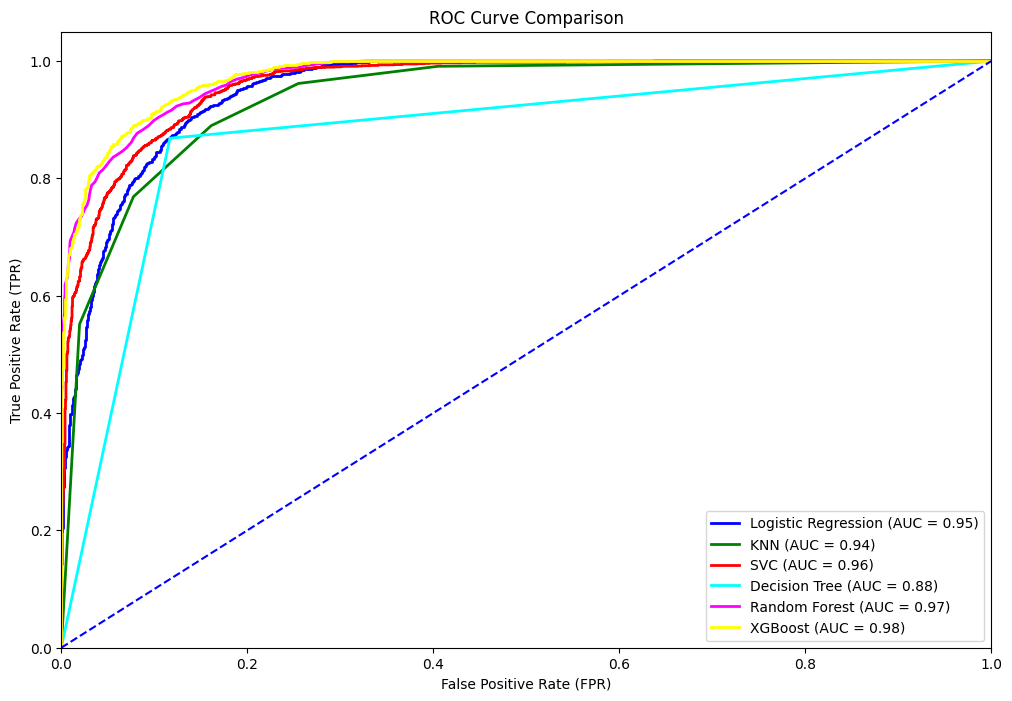

In [35]:
# Colors for the plots
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Train, predict and evaluate each model
plt.figure(figsize=(12, 8))
for (name, model), color in zip(models.items(), colors):
    # Plot ROC curve
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Creates a line from point (0,0) to thr point (1,1)
plt.xlim([0.0, 1.0]) # This line sets the limits of the x-axis to range from 0.0 to 1.0.
plt.ylim([0.0, 1.05]) # This line sets the limits of the y-axis to range from 0.0 to 1.05.
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

**XGBoost** have the highest **AUC Score**, so **XGBoost** is the best model for our dataset.

# **XGBoost Model**

In [36]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Learning rate
    max_depth=6,               # Maximum depth of a tree
    objective='binary:logistic',  # Objective for binary classification
    eval_metric='auc',         # Evaluation metric
    random_state=42            # Random seed for reproducibility
)

In [37]:
# Train the XGBoost model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

# **Evaluate XGBoost Model**

In [38]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names = ['Rejected', 'Approved']))

Classification Report:
               precision    recall  f1-score   support

    Rejected       0.91      0.89      0.90      1985
    Approved       0.89      0.91      0.90      2015

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



**Detail Classification Report :**

**Accuracy :** 90%

**F1-Score Macro :** 90%

**Rejected :**
- **Precision :** 0.91, it means that class **0 (Rejected)** 91% **correctly classified** from all samples predicted as **0 (Rejected)**.
- **Recall :** 0.89, it means that class **0 (Rejected)** 89% **correctly predicted** from all **true 0 (Rejected)** samples.
- **F1-Score :** 0.90, it means that the balance between precision and recall is **really good**.

**Conclusion :** The model performs **very well** with **class 0 (Rejected)**.

**Approved :**
- **Precision :** 0.89, it means that class **1 (Approved)** 89% **correctly classified** from all samples predicted as **1 (Approved)**.
- **Recall :** 0.91, it means that class **1 (Approved)** 91% **correctly predicted** from all **true 1 (Approved)** samples.
- **F1-Score :** 0.90, it means that the balance between precision and recall is **really good** though.

**Conclusion :** The model performs **very well** in **class 1 (Approved)**.

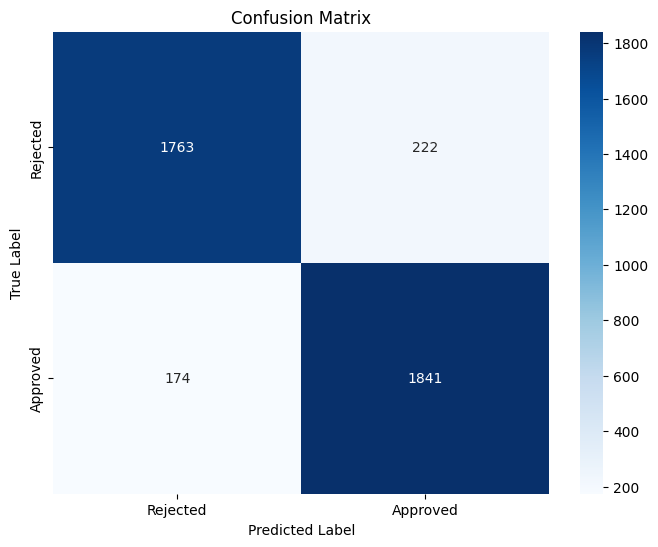

In [39]:
# Confusion Matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ["Rejected", "Approved"]
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Add labels, title, and axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Detail Confusion Matrix :**

**Class 0 (Rejected) :**
- **True Positive :** 1763 it means that 1763 samples were **correctly predicted** as class 0.
- **False Positive :** 222, it means that 222 samples were **true 0 (Rejected)** but **mispredicted**.

**Class 1 (Approved) :**
- **True Positive :** 1841, it means that 1841 samples were **correctly predicted** as class 1.
- **False Positive :** 174, it means that 174 samples were **true 1 (Approved)** but **mispredicted**.

AUC Score: 0.97


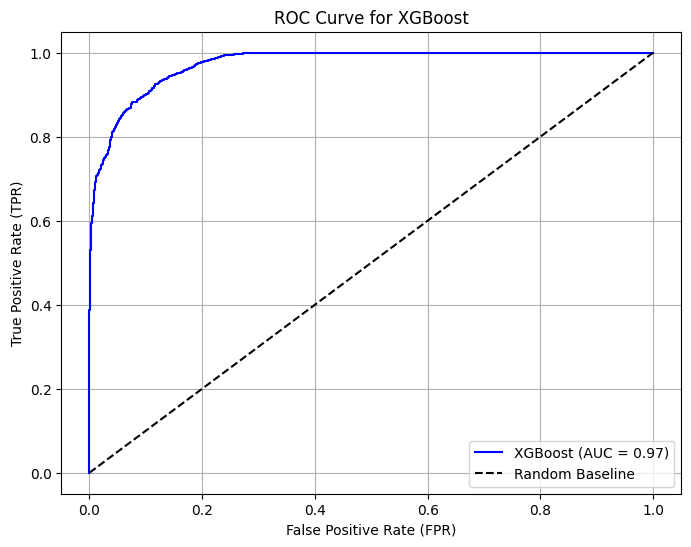

In [40]:
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')  # Diagonal line
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Based on the **AUC score**, we can see that the model can predicted **really good** for each class. We can see it from the **AUC score** is close to 1, it proves that the model's predictions were not a **coincidence**. An AUC of 0.97 means that for a randomly chosen positive example (loan approved) and a randomly chosen negative example (loan rejected), the model **correctly ranks the positive example** higher 97% of the time.

# **Fine-Tuning XGBoost Model**

In [41]:
# Import library
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for fine-tuning
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [3, 6, 10],              # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'subsample': [0.6, 0.8, 1.0],         # Subsampling ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsampling ratio of columns when constructing trees
    'gamma': [0, 1, 5],                   # Minimum loss reduction to make a split
}

In [42]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator = xgb_model,
    param_grid = param_grid,
    scoring = 'f1_macro',   # Optimize for AUC score
    cv = 3,                # 3-fold cross-validation
    verbose = 1,           # Print progress
    n_jobs = -1            # Use all available CPU cores
)

In [43]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best F1-Score: 0.9094216665143845


In [44]:
# Train the best model on the full training data
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# **Evaluate XGBoost Model After Fine-Tuning**

In [45]:
# Evaluate the model
y_pred = best_xgb_model.predict(x_test)
y_pred_prob = best_xgb_model.predict_proba(x_test)[:, 1]

In [46]:
# Classification Report
print("Classification Report (Tuned XGBoost):\n", classification_report(y_test, y_pred, target_names = ['Rejected', 'Approved']))

Classification Report (Tuned XGBoost):
               precision    recall  f1-score   support

    Rejected       0.92      0.90      0.91      1985
    Approved       0.90      0.92      0.91      2015

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



**Detail Classification Report :**

**Accuracy :** 91%

**F1-Score Macro :** 91%

**Rejected :**
- **Precision :** 0.92, it means that class **0 (Rejected)** 92% **correctly classified** from all samples predicted as **0 (Rejected)**.
- **Recall :** 0.90, it means that class **0 (Rejected)** 90% **correctly predicted** from all **true 0 (Rejected)** samples.
- **F1-Score :** 0.91, it means that the balance between precision and recall is **really good**.

**Conclusion :** The model performs **very well** with **class 0 (Rejected)**.

**Approved :**
- **Precision :** 0.90, it means that class **1 (Approved)** 90% **correctly classified** from all samples predicted as **1 (Approved)**.
- **Recall :** 0.92, it means that class **1 (Approved)** 92% **correctly predicted** from all **true 1 (Approved)** samples.
- **F1-Score :** 0.91, it means that the balance between precision and recall is **really good** though.

**Conclusion :** The model performs **very well** in **class 1 (Approved)**.

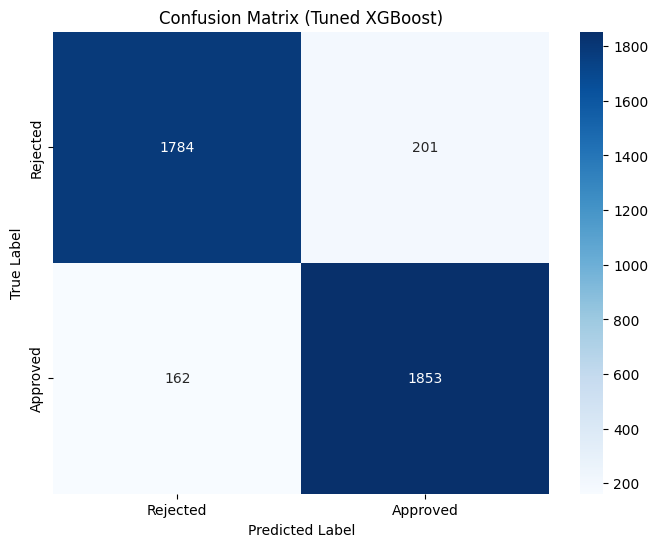

In [47]:
# Confusion Matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ["Rejected", "Approved"]
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Add labels, title, and axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Tuned XGBoost)")
plt.show()

**Detail Confusion Matrix :**

**Class 0 (Rejected) :**
- **True Positive :** 1784 it means that 1784 samples were **correctly predicted** as class 0.
- **False Positive :** 201, it means that 201 samples were **true 0 (Rejected)** but **mispredicted**.

**Class 1 (Approved) :**
- **True Positive :** 1853, it means that 1853 samples were **correctly predicted** as class 1.
- **False Positive :** 162, it means that 162 samples were **true 1 (Approved)** but **mispredicted**.

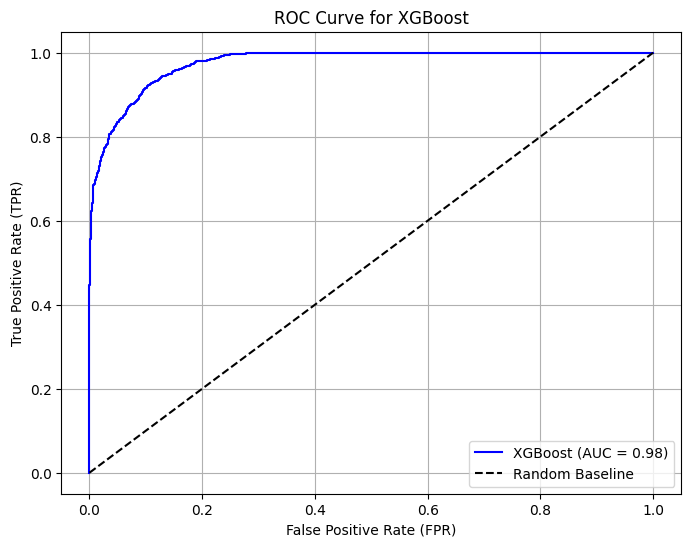

In [48]:
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')  # Diagonal line
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**AUC score increases** about 0.01, it **doesn't increase too much** because the score is already **exceptionally high**, suggesting that our model is performing **very well** at distinguishing between the classes.